# Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [15]:
churn = pd.read_csv("customer_churn.csv")

print(churn.info())
print(churn.describe())
print(churn.isnull().sum())

for column in churn.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {churn[column].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

# Exploratory Data Analysis (EDA):

Churn Probability

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


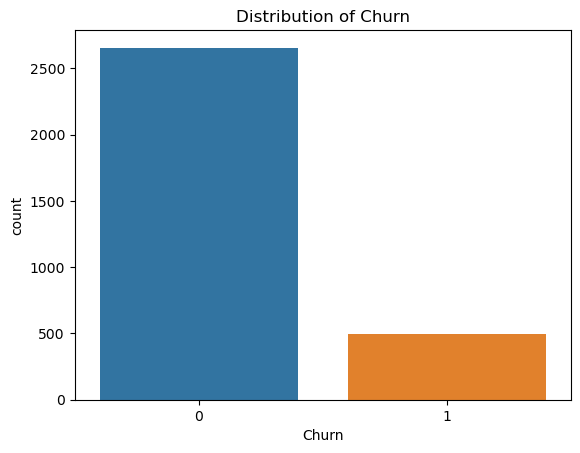

In [16]:
# 0 = no chance, 1 = chance
sns.countplot(x='Churn', data=churn)
plt.title('Distribution of Churn')
plt.show()

Heatmap

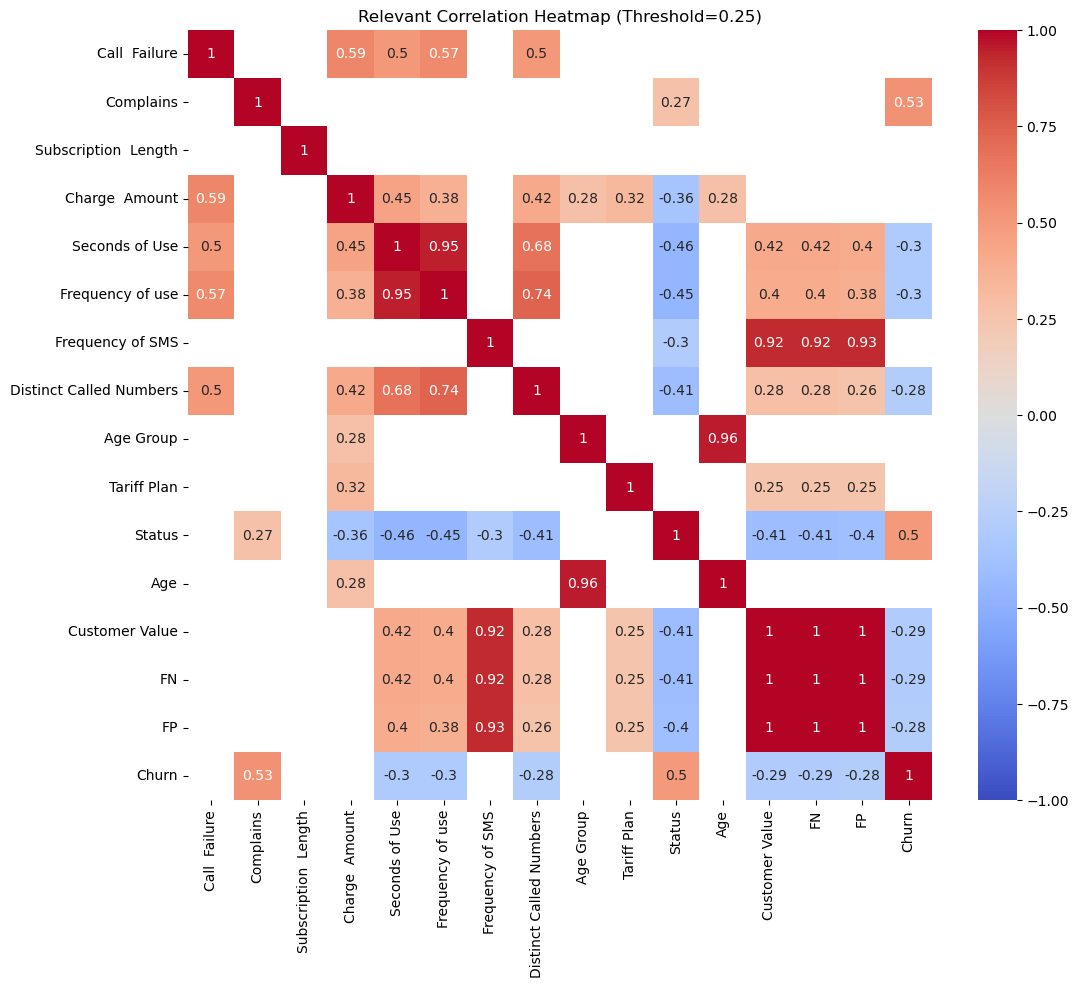

In [17]:
correlation_threshold = 0.25
relevant_correlations = corr_matrix[abs(corr_matrix) > correlation_threshold]

plt.figure(figsize=(12, 10))
sns.heatmap(relevant_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Relevant Correlation Heatmap (Threshold={correlation_threshold})')
plt.show()

Histograms

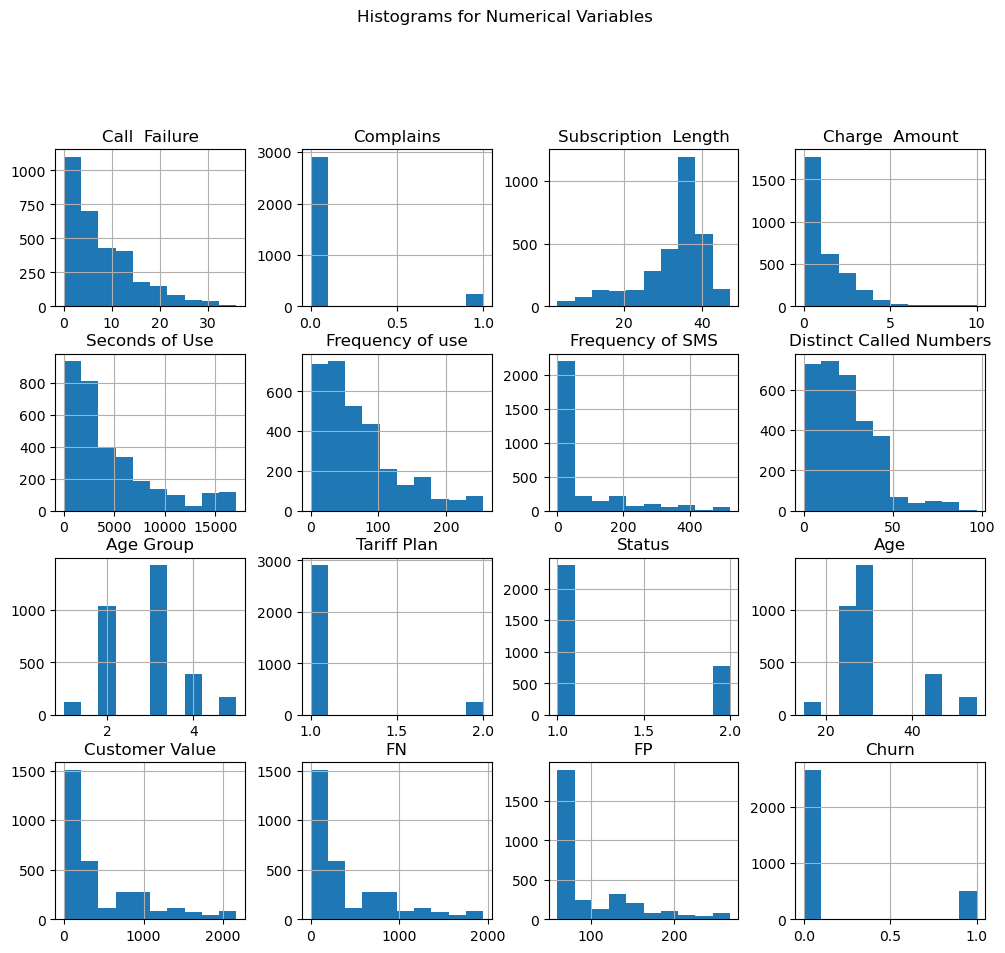

In [18]:
churn.hist(figsize=(12, 10))
plt.suptitle('Histograms for Numerical Variables', y=1.02)
plt.show()

# Machine Learning Model

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


X = churn.drop('Churn', axis=1)
y = churn['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with hyperparameter tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rf_model.set_params(**best_params)

# Train the Random Forest model with tuned hyperparameters
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Accuracy: 0.9380952380952381
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.87      0.76      0.81       110

    accuracy                           0.94       630
   macro avg       0.91      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

# Model Alternatives

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_params = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid=svm_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
svm_model.set_params(**best_params_svm)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test, y_pred_svm))

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb_model, param_grid=gb_params, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
gb_model.set_params(**best_params_gb)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(classification_report(y_test, y_pred_gb))

knn_params = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_model, param_grid=knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
knn_model.set_params(**best_params_knn)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(classification_report(y_test, y_pred_knn))

/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Support Vector Machine:
Accuracy: 0.8761904761904762
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       520
           1       0.68      0.55      0.61       110

    accuracy                           0.88       630
   macro avg       0.79      0.75      0.77       630
weighted avg       0.87      0.88      0.87       630



/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta


Gradient Boosting Classifier:
Accuracy: 0.9396825396825397
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       520
           1       0.88      0.75      0.81       110

    accuracy                           0.94       630
   macro avg       0.92      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630


K-Nearest Neighbors:
Accuracy: 0.8698412698412699
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       520
           1       0.68      0.49      0.57       110

    accuracy                           0.87       630
   macro avg       0.79      0.72      0.75       630
weighted avg       0.86      0.87      0.86       630



/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta